In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

## importing marketing data

In [2]:
mark_data = pd.read_csv("C:\\Users\\Amar Shilvanth\\Downloads\\marketing data.csv")

In [4]:
mark_data

,months since last purchase,$value of the historical purchases,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [5]:
mark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   months since last purchase          64000 non-null  int64  
 1   $value of the historical purchases  64000 non-null  float64
 2   used_discount                       64000 non-null  int64  
 3   used_bogo                           64000 non-null  int64  
 4   zip_code                            64000 non-null  object 
 5   is_referral                         64000 non-null  int64  
 6   channel                             64000 non-null  object 
 7   offer                               64000 non-null  object 
 8   conversion                          64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [7]:
mark_data.isnull().sum()

months since last purchase            0
$value of the historical purchases    0
used_discount                         0
used_bogo                             0
zip_code                              0
is_referral                           0
channel                               0
offer                                 0
conversion                            0
dtype: int64

### converting object type variable into float/int

In [9]:
Object = LabelEncoder()

In [10]:
mark_data["zip_code"] = Object.fit_transform(mark_data["zip_code"])
mark_data["channel"] = Object.fit_transform(mark_data["channel"])
mark_data["offer"] = Object.fit_transform(mark_data["offer"])

In [12]:
mark_data

,months since last purchase,$value of the historical purchases,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,1,0,1,0,0
1,6,329.08,1,1,0,1,2,2,0
2,7,180.65,0,1,1,1,2,0,0
3,9,675.83,1,0,0,1,2,1,0
4,2,45.34,1,0,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,2,0,2,1,0
63996,5,38.91,0,1,2,1,1,1,0
63997,6,29.99,1,0,2,1,1,1,0
63998,1,552.94,1,0,1,1,0,0,0


### seperating dependent and independent variable

In [13]:
y = mark_data["conversion"]
x = mark_data.drop(columns=["conversion"], axis = 1)

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 2021)

In [20]:
# random forest model fitting
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# predicting of test data
rfc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
# checking the accuracy score
accuracy_score(y_test, rfc.predict(X_test))

0.8000520833333333

In [23]:
confusion_matrix(y_test,rfc.predict(X_test))

array([[15037,  1336],
       [ 2503,   324]], dtype=int64)

In [24]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     16373
           1       0.20      0.11      0.14      2827

    accuracy                           0.80     19200
   macro avg       0.53      0.52      0.52     19200
weighted avg       0.76      0.80      0.78     19200



In [25]:
# checking the crosss-validation score
cross_val_score(rfc,X_test,y_test,cv = 5).mean()

0.8086979166666666

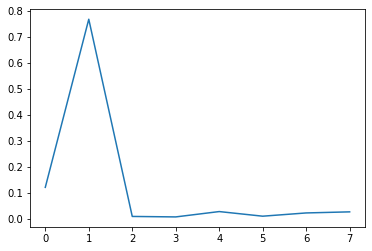

In [28]:
# checking which variable play a important role in created RFC model
plt.plot(rfc.feature_importances_)

In [38]:
New_pred = np.array([1,142.44,0,1,1,0,2,1]).reshape(1,8)

In [39]:
rfc.predict(New_pred)

array([0], dtype=int64)